In [3]:
import pandas as pd


**loading dataset into dataframe**

In [4]:
trades = pd.read_csv('historical_data.csv')

In [5]:
trades.columns

Index(['Account', 'Coin', 'Execution Price', 'Size Tokens', 'Size USD', 'Side',
       'Timestamp IST', 'Start Position', 'Direction', 'Closed PnL',
       'Transaction Hash', 'Order ID', 'Crossed', 'Fee', 'Trade ID',
       'Timestamp'],
      dtype='object')

**understanding the info in dataframes**

In [6]:
trades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 211224 entries, 0 to 211223
Data columns (total 16 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Account           211224 non-null  object 
 1   Coin              211224 non-null  object 
 2   Execution Price   211224 non-null  float64
 3   Size Tokens       211224 non-null  float64
 4   Size USD          211224 non-null  float64
 5   Side              211224 non-null  object 
 6   Timestamp IST     211224 non-null  object 
 7   Start Position    211224 non-null  float64
 8   Direction         211224 non-null  object 
 9   Closed PnL        211224 non-null  float64
 10  Transaction Hash  211224 non-null  object 
 11  Order ID          211224 non-null  int64  
 12  Crossed           211224 non-null  bool   
 13  Fee               211224 non-null  float64
 14  Trade ID          211224 non-null  float64
 15  Timestamp         211224 non-null  float64
dtypes: bool(1), float64(

In [7]:
trades.describe()

,Execution Price,Size Tokens,Size USD,Start Position,Closed PnL,Order ID,Fee,Trade ID,Timestamp
count,211224.000000,2.112240e+05,2.112240e+05,2.112240e+05,211224.000000,2.112240e+05,211224.000000,2.112240e+05,2.112240e+05
mean,11414.723350,4.623365e+03,5.639451e+03,-2.994625e+04,48.749001,6.965388e+10,1.163967,5.628549e+14,1.737744e+12
std,29447.654868,1.042729e+05,3.657514e+04,6.738074e+05,919.164828,1.835753e+10,6.758854,3.257565e+14,8.689920e+09
min,0.000005,8.740000e-07,0.000000e+00,-1.433463e+07,-117990.104100,1.732711e+08,-1.175712,0.000000e+00,1.680000e+12
25%,4.854700,2.940000e+00,1.937900e+02,-3.762311e+02,0.000000,5.983853e+10,0.016121,2.810000e+14,1.740000e+12
50%,18.280000,3.200000e+01,5.970450e+02,8.472793e+01,0.000000,7.442939e+10,0.089578,5.620000e+14,1.740000e+12
75%,101.580000,1.879025e+02,2.058960e+03,9.337278e+03,5.792797,8.335543e+10,0.393811,8.460000e+14,1.740000e+12
max,109004.000000,1.582244e+07,3.921431e+06,3.050948e+07,135329.090100,9.014923e+10,837.471593,1.130000e+15,1.750000e+12


**checking for null values**


In [8]:
trades.isna().sum()

Account             0
Coin                0
Execution Price     0
Size Tokens         0
Size USD            0
Side                0
Timestamp IST       0
Start Position      0
Direction           0
Closed PnL          0
Transaction Hash    0
Order ID            0
Crossed             0
Fee                 0
Trade ID            0
Timestamp           0
dtype: int64

**Getting the first rows**

In [9]:
trades.head(2)

,Account,Coin,Execution Price,Size Tokens,Size USD,Side,Timestamp IST,Start Position,Direction,Closed PnL,Transaction Hash,Order ID,Crossed,Fee,Trade ID,Timestamp
0,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9769,986.87,7872.16,BUY,02-12-2024 22:50,0.000000,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.345404,8.950000e+14,1.730000e+12
1,0xae5eacaf9c6b9111fd53034a602c192a04e082ed,@107,7.9800,16.00,127.68,BUY,02-12-2024 22:50,986.524596,Buy,0.0,0xec09451986a1874e3a980418412fcd0201f500c95bac...,52017706630,True,0.005600,4.430000e+14,1.730000e+12


**to get traders behaviour we need aggregate the data based on timestamp**

In [10]:
trades['Timestamp IST'] = pd.to_datetime(trades['Timestamp IST'], format='%d-%m-%Y %H:%M')

**extracting the date from timestamp that was corrected earlier**

In [11]:
trades['trade_date'] = trades['Timestamp IST'].dt.date

In [12]:
trades['trade_date']

0         2024-12-02
1         2024-12-02
2         2024-12-02
3         2024-12-02
4         2024-12-02
             ...    
211219    2025-04-25
211220    2025-04-25
211221    2025-04-25
211222    2025-04-25
211223    2025-04-25
Name: trade_date, Length: 211224, dtype: object

**Createing the dialy metrics for traders behavior**


In [13]:
daily = trades.groupby('trade_date').agg(
    total_trades=('Account', 'count'),         # no of trades executed
    total_volume_usd=('Size USD', 'sum'),      #total vol traded in USD
    avg_execution_price=('Execution Price', 'mean'),  #avg execution price
    total_pnl=('Closed PnL', 'sum'),           #total pnl by date
    avg_pnl=('Closed PnL', 'mean'),            #avg pnl per trade
    win_rate=('Closed PnL', lambda x: (x > 0).mean()) #win rate calculation
).reset_index() 

In [14]:
daily.head(2)

,trade_date,total_trades,total_volume_usd,avg_execution_price,total_pnl,avg_pnl,win_rate
0,2023-05-01,3,477.00,1898.133333,0.0,0.0,0.0
1,2023-12-05,9,50005.83,11038.300000,0.0,0.0,0.0


**Loading the sentiment data and merge**

In [15]:
sentiment=pd.read_csv('fear_greed_index.csv')

In [16]:
sentiment.head(2)

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02


**setting up the cols[date] format same as historical_data.csv**

In [17]:
sentiment['date'] = pd.to_datetime(sentiment['date'], errors='coerce').dt.date

In [18]:
sentiment.head(2)

,timestamp,value,classification,date
0,1517463000,30,Fear,2018-02-01
1,1517549400,15,Extreme Fear,2018-02-02


**now mergin both dataframes of daily metrics and then sentiment**

In [19]:
merged=pd.merge(daily,
                sentiment[['date','classification']],
                left_on='trade_date',
                right_on='date',
                how='left') 

In [20]:
print(sentiment.columns)

Index(['timestamp', 'value', 'classification', 'date'], dtype='object')


In [21]:
merged.head()

,trade_date,total_trades,total_volume_usd,avg_execution_price,total_pnl,avg_pnl,win_rate,date,classification
0,2023-05-01,3,477.00,1898.133333,0.000000,0.000000,0.000000,2023-05-01,Greed
1,2023-12-05,9,50005.83,11038.300000,0.000000,0.000000,0.000000,2023-12-05,Extreme Greed
2,2023-12-14,11,113203.35,8031.868818,-205.434737,-18.675885,0.363636,2023-12-14,Greed
3,2023-12-15,2,10609.95,2.982000,-24.632034,-12.316017,0.000000,2023-12-15,Greed
4,2023-12-16,3,15348.77,0.384707,0.000000,0.000000,0.000000,2023-12-16,Greed


**Insights** **Visualisation**

**Determine whether market sentiment affects trader profitability**

In [23]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pnl_by_sentiment = merged.groupby('classification')['avg_pnl'].mean().reset_index()
print(pnl_by_sentiment)

  classification    avg_pnl
0   Extreme Fear  38.433903
1  Extreme Greed  56.736108
2           Fear  31.276567
3          Greed  39.412175
4        Neutral  63.820699


**visualising average profit and loss per trade**

C:\Users\hp\AppData\Local\Temp\ipykernel_24332\1581211609.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=pnl_by_sentiment, x='classification', y='avg_pnl', palette='coolwarm')


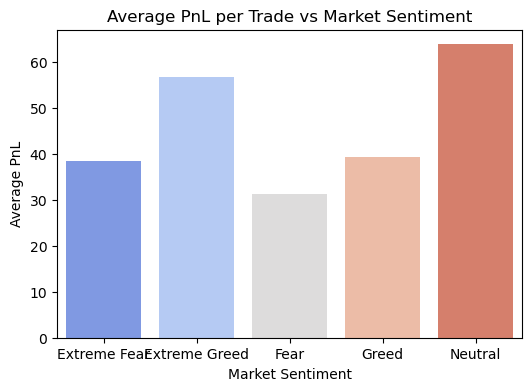

In [25]:
plt.figure(figsize=(6,4))
sns.barplot(data=pnl_by_sentiment, x='classification', y='avg_pnl', palette='coolwarm')
plt.title('Average PnL per Trade vs Market Sentiment')
plt.ylabel('Average PnL')
plt.xlabel('Market Sentiment')
plt.show()

**Do traders win more trades when fear or greed**

In [ ]:

merged['is_profitable_day'] = merged['total_pnl'] > 0


profitability = (
    merged.groupby('classification')['is_profitable_day']
    .mean()
    .reset_index()
    .rename(columns={'is_profitable_day': 'profitability_rate'})
)

In [29]:
profitability['profitability_rate'] = profitability['profitability_rate'] * 100

print(profitability)

  classification  profitability_rate
0   Extreme Fear           64.285714
1  Extreme Greed           87.719298
2           Fear           73.626374
3          Greed           72.538860
4        Neutral           67.164179


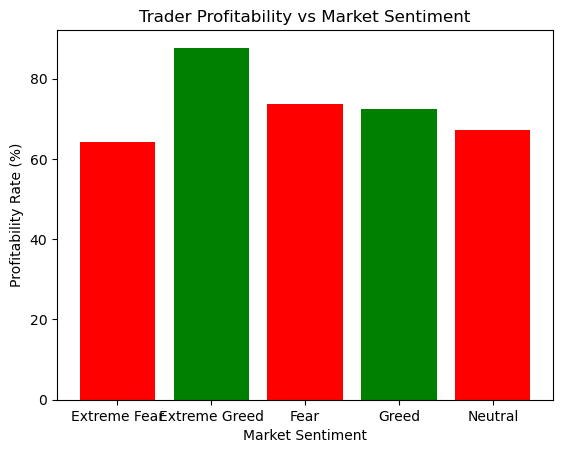

In [30]:

plt.bar(profitability['classification'], profitability['profitability_rate'], color=['red','green'])
plt.title("Trader Profitability vs Market Sentiment")
plt.ylabel("Profitability Rate (%)")
plt.xlabel("Market Sentiment")
plt.show()


**See if traders trade more aggressively (higher volume) during Greed days or stay cautious during Fear.**

In [33]:
volume_sentiment = (
    merged.groupby('classification')
    .agg(
        avg_daily_volume_usd=('total_volume_usd', 'mean'),
        total_volume_usd=('total_volume_usd', 'sum')
    )
    .reset_index()
)
print(volume_sentiment)

  classification  avg_daily_volume_usd  total_volume_usd
0   Extreme Fear          8.177447e+06      1.144843e+08
1  Extreme Greed          1.091800e+06      1.244652e+08
2           Fear          5.311261e+06      4.833248e+08
3          Greed          1.495246e+06      2.885825e+08
4        Neutral          2.690180e+06      1.802421e+08


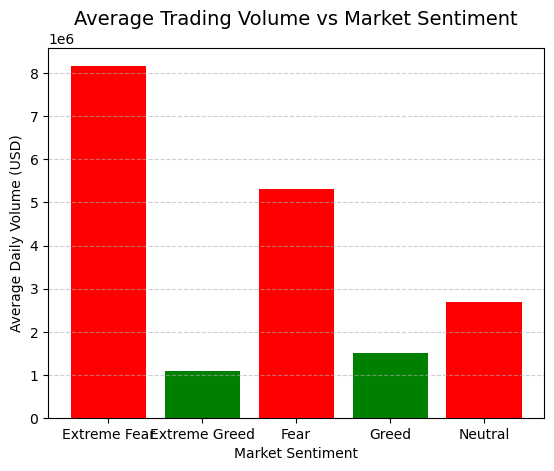

In [32]:
plt.bar(volume_sentiment['classification'], volume_sentiment['avg_daily_volume_usd'], color=['red','green'])
plt.title("Average Trading Volume vs Market Sentiment", fontsize=14)
plt.ylabel("Average Daily Volume (USD)")
plt.xlabel("Market Sentiment")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

**To see if traders take risk in greedy markets**

In [34]:
risk_sentiment = (
    merged.groupby('classification')['total_volume_usd']
    .mean()
    .reset_index()
    .rename(columns={'total_volume_usd': 'avg_trade_size_usd'})
)

print(risk_sentiment)

  classification  avg_trade_size_usd
0   Extreme Fear        8.177447e+06
1  Extreme Greed        1.091800e+06
2           Fear        5.311261e+06
3          Greed        1.495246e+06
4        Neutral        2.690180e+06


In [ ]:
plt.bar(risk_sentiment['classification'], risk_sentiment['avg_trade_size_usd'], color=['red','green'])
plt.title("Average Trade Size  vs Market Sentiment", fontsize=14)
plt.ylabel("Average Trade Size (USD)")
plt.xlabel("Market Sentiment")
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

**Profitability over time**

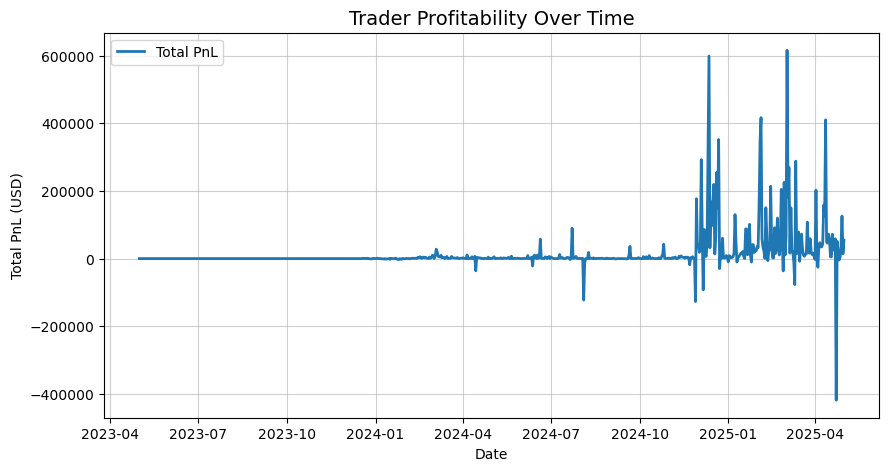

In [38]:
merged_sorted = merged.sort_values('trade_date')

plt.figure(figsize=(10,5))
plt.plot(merged_sorted['trade_date'], merged_sorted['total_pnl'], label='Total PnL', linewidth=2)
plt.title("Trader Profitability Over Time", fontsize=14)
plt.xlabel("Date")
plt.ylabel("Total PnL (USD)")
plt.legend()
plt.grid(alpha=0.6)
plt.show()